In [5]:
%load_ext autoreload
%autoreload 2

from src.models.SIRV import sweep_pol_SPB_SIRV, sweep_pol_mean_SIRV, sweep_pol_hom_SIRV
#from src.models.SIRV_D import sweep_pol_SPB_SIRVD
from src.utils.distributions import pol_to_alpha, homogeneous_distribution
from plot_functions import *
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import os

path_Plot_with_labels = "../figures/with_labels/"
path_Plot_without_labels = "../figures/no_labels/"

if not os.path.exists(path_Plot_with_labels):
    os.makedirs(path_Plot_with_labels)

if not os.path.exists(path_Plot_without_labels):
    os.makedirs(path_Plot_without_labels)
def ALPHAS(Np):
    return pol_to_alpha(np.linspace(1/Np/2, 1-1/Np/2, Np)/4)



my_hot_r = discretize_cmaps('hot_r', 12)
my_hot_r.set_bad('gray')

my_vir_r = discretize_cmaps('viridis_r', 12)
my_vir_r.set_bad('gray')
CP1 = ['#fdbb84','#fc8d59','#ef6548','#d7301f','#990000']   # POL
CP2 = ['#d9f0a3','#addd8e','#78c679','#31a354','#006837']      # what varies is: MEAN
CP3 = ['#d0d1e6','#a6bddb','#74a9cf','#2b8cbe','#045a8d']      # HOM

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
NP = 100
NS = 100

vacc_max_range={"m": 0, "M": 0.1, "n": NS}
pol_range={"m": 0, "M": 1, "n": NP}

vaccs = np.linspace(vacc_max_range["m"], vacc_max_range["M"], vacc_max_range["n"])
pols = np.linspace(pol_range["m"], pol_range["M"], pol_range["n"])

results = sweep_pol_SPB_SIRV(
    vacc_max_range=vacc_max_range,
    pol_range=pol_range,
    h=0,
    dT=1,
    T=1000,
    batch_size=1000
)

(S_final, I_final, R_final, V_final), R0, OH = results
S = np.sum(S_final, axis=1)
I = np.sum(I_final, axis=1)
R = np.sum(R_final, axis=1)
V = np.sum(V_final, axis=1)

# Reshape them to the original shape NP x NS
S = S.reshape(NP, NS).transpose()
I = I.reshape(NP, NS).transpose()
R = R.reshape(NP, NS).transpose()
V = V.reshape(NP, NS).transpose()
R0 = R0.reshape(NP, NS).transpose()
OH = OH.reshape(NP, NS).transpose()

FIG_A_RI = R + I
FIG_A_R0 = R0
FIG_A_OH = OH
FIG_A_V = V  # New plot for vaccination coverage

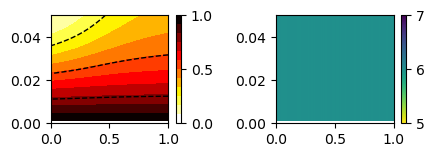

In [45]:
xi_M = np.linspace(0, 0.05, NS)  # Vaccination rate range
pol = np.linspace(0,1, NP)
name = "I(pol,vacc)_SIRV.pdf"

fig, ax = plt.subplots(1,2, figsize=(2*Lx, Ly))  # Added one more subplot

# Total removed (R+I+V)
cax = ax[0].imshow(FIG_A_RI, cmap=my_hot_r, aspect="auto", origin="lower", 
                  extent=[0,1,0.001,0.05], vmin=0, vmax=1)
cbar = fig.colorbar(cax, ax=ax[0])
CS = ax[0].contour(pol, xi_M, FIG_A_RI, levels=[0.25, 0.5, 0.75], 
                   linewidths=1, colors="black", linestyles="dashed")
#ax[0].set_title('Total Infected (R+I)')

# R0
cax = ax[1].imshow(FIG_A_R0, cmap="viridis_r", aspect="auto", origin="lower", 
                   extent=[0,1,0.001,0.05], vmin=5, vmax=7)
cbar = fig.colorbar(cax, ax=ax[1])
CS = ax[1].contour(pol, xi_M, FIG_A_R0, levels=[1, 1.5, 2, 2.5], 
                   linewidths=1, colors="black", linestyles="dashed")


fig.tight_layout()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


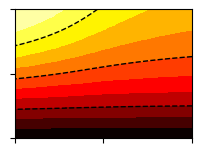

In [46]:
name = "I(pol,beta)_SIRV.pdf"

fig, ax = plt.subplots(figsize=(Lx, Ly))
cax = ax.imshow(FIG_A_RI, cmap =  my_hot_r, aspect = "auto", origin = "lower", extent = [pols[0],pols[-1],vaccs[0],vaccs[-1]], vmin = 0, vmax = 1)
cbar = fig.colorbar(cax, ax = ax)
CS = ax.contour(pols, vaccs,np.array(FIG_A_RI), levels = [0.25, 0.5, 0.75], linewidths = 1, colors = "black", linestyles = "dashed")
CS = ax.contour(pols, vaccs,FIG_A_R0, levels = [1.5, 2, 2.5], linewidths = 0.5, colors = "black")
ax.set_xlim([0,1])
ax.set_ylim([0,0.1])
ax.set_xticks([0,.5,1])
ax.set_yticks([0,vaccs[-1]/2,vaccs[-1]])

fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


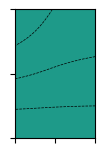

In [47]:
name = "R0(pol,beta)_SIRV.pdf"

fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
cax = ax.imshow(FIG_A_R0, cmap =  my_vir_r, aspect = "auto", origin = "lower", extent = [pols[0],pols[-1],vaccs[0],vaccs[-1]], vmin = 5.001, vmax = 7.001)
cbar = fig.colorbar(cax, ax = ax)
CS = ax.contour(pols, vaccs,FIG_A_RI, levels = [0.25, 0.5, 0.75], linewidths = 0.5, colors = "black", linestyles = "dashed")
ax.set_xticks([0,.5,1])
ax.set_yticks([0,vaccs[-1]/2,vaccs[-1]])
fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)

In [51]:
NP = 100
NS = 1
N_COMPARTMENTS = 100


vacc_max_range={"m": 0.075, "M": 0.075, "n": NS}
pol_range={"m": 0, "M": 1, "n": NP}

vaccs = np.linspace(vacc_max_range["m"], vacc_max_range["M"], vacc_max_range["n"])
pols = np.linspace(pol_range["m"], pol_range["M"], pol_range["n"])

results = sweep_pol_SPB_SIRV(
    vacc_max_range=vacc_max_range,
    pol_range=pol_range,
    h=0,
    dT=1,
    T=1000,
    batch_size=1000,
    N_COMPARTMENTS=N_COMPARTMENTS
)

(S_final, I_final, R_final, V_final), _, _ = results

S = S_final.reshape(NP, N_COMPARTMENTS).transpose()
I = I_final.reshape(NP, N_COMPARTMENTS).transpose()
R = R_final.reshape(NP, N_COMPARTMENTS).transpose()
V = V_final.reshape(NP, N_COMPARTMENTS).transpose()

Sf = np.zeros((N_COMPARTMENTS, NP))
If = np.zeros((N_COMPARTMENTS, NP))
Rf = np.zeros((N_COMPARTMENTS, NP))
Vf = np.zeros((N_COMPARTMENTS, NP))
for i in range(NP):

    N_i = S_final[i,:] + I_final[i,:] + R_final[i,:] + V_final[i,:]
    Sf[:,i] = S_final[i,:]/N_i
    If[:,i] = I_final[i,:]/N_i
    Rf[:,i] = R_final[i,:]/N_i
    Vf[:,i] = V_final[i,:]/N_i

RI = Rf + If
name = "RI_fraction_SIRV.pdf"
fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
cax = ax.imshow(np.flipud(RI), cmap = my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0,1], vmin = 0, vmax = 1, interpolation = "none")
cbar = fig.colorbar(cax, ax = ax)
ax.set_yticks([0,0.5,1])

fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)

KeyboardInterrupt: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


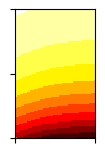

In [29]:
NP = 100  # number of polarization points
NM = 100  # number of mean points
pol_range={"m": 0, "M": 1, "n": NP}  # polarization range
mean_range={"m": 0.0, "M": 1.0, "n": NM}         # mean range

pols = homogeneous_distribution(NP, 0, 1)
means  = homogeneous_distribution(NM, 0, 1)

results = sweep_pol_mean_SIRV(
    mean_range=mean_range,
    pol_range=pol_range,
    h=0,
    dT=1,
    T=1000,
    susceptibility_rate=0.6,  # This replaces the susceptibility range
    batch_size=1000,
    vaccination_rate=0.06
)

(S_final, I_final, R_final, V_final), R0, OH = results
S = np.sum(S_final, axis=1)
I = np.sum(I_final, axis=1)
R = np.sum(R_final, axis=1)

# Reshape arrays
S = np.flipud(S.reshape(NP, NM))
I = np.flipud(I.reshape(NP, NM))
R = np.flipud(R.reshape(NP, NM))
R0 = np.flipud(R0.reshape(NP, NM))
OH = np.flipud(OH.reshape(NP, NM))

FIG_B_RI = R + I
FIG_B_R0 = R0
FIG_B_OH = OH

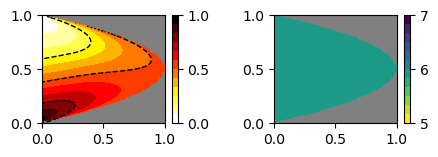

In [30]:
# Create axis values
mean_vals = np.linspace(0.0, 1.0, NM)
pol = np.linspace(1/NP/2, 1-1/NP/2, NP)

# Plotting
fig, ax = plt.subplots(1,2, figsize=(2*Lx, Ly))

cax = ax[0].imshow(FIG_B_RI,  cmap=my_hot_r,  aspect="auto", origin="lower", 
    extent=[0, 1, 0, 1],  # Note: changed to [0,1,0,1] since both axes are now in [0,1]
    vmin=0, vmax=1)
cbar = fig.colorbar(cax, ax=ax[0])

CS = ax[0].contour(pol, mean_vals, FIG_B_RI, 
    levels=[0.25, 0.5, 0.75], linewidths=1, 
    colors="black", linestyles="dashed")

cax = ax[1].imshow(FIG_B_R0, cmap=my_vir_r, aspect="auto", origin="lower",
    extent=[0, 1, 0, 1], vmin = 4.999, vmax = 7.002)  # Note: changed to [0,1,0,1] since both axes are now in [0,1]
cbar = fig.colorbar(cax, ax=ax[1])

fig.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


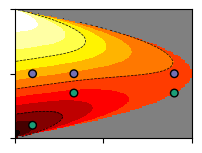

In [31]:
col_pol_circles = ["#1b9e77", "#7570b3"]
name = "I(pol,mean)_SIRV.pdf"

fig, ax = plt.subplots(figsize=(Lx, Ly))
cax = ax.imshow(FIG_B_RI, cmap =  my_hot_r, aspect = "auto", origin = "lower", extent = [pol_range["m"],pol_range["M"],mean_range["m"],mean_range["M"]], vmin = 0, vmax = 1)
cbar = fig.colorbar(cax, ax = ax)
CS = ax.contour(pol, mean_vals, FIG_B_RI, 
    levels=[0.25, 0.5, 0.75], linewidths=0.5, 
    colors="black", linestyles="dashed")

Xs = np.array([0.1, 0.3, 0.5, 0.7, 0.9])
Ys = np.zeros(5)+0.001

#ax.plot(1-Xs, 1-Ys, 'o', color='black', markersize=1)
#ax.plot(1-Ys, 1-Xs, 'o', color='black', markersize=1)

Xs = np.array([0.1, 0.1, 1/3, 1/3, 0.9, 0.9])
Ys = np.array([0.1, 0.5, 0.35, 0.5, 0.35, 0.5])
Colors = [col_pol_circles[0], col_pol_circles[1],col_pol_circles[0], col_pol_circles[1],col_pol_circles[0], col_pol_circles[1]]

ax.scatter(Xs, Ys, c=Colors, marker='o', s=30, zorder = 100,edgecolors='black')

ax.set_xticks([0,0.5,1])
ax.set_yticks([0,0.5,1])
fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


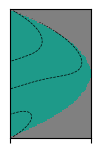

In [32]:
name = "R0(pol,mean)_SIRV.pdf"

fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
cax = ax.imshow(FIG_B_R0, cmap =  my_vir_r, aspect = "auto", origin = "lower", extent = [pol_range["m"],pol_range["M"],mean_range["m"],mean_range["M"]], vmin = 5.001, vmax = 7.001)
cbar = fig.colorbar(cax, ax = ax)
CS = ax.contour(pol, mean_vals, FIG_B_RI, 
    levels=[0.25, 0.5, 0.75], linewidths=0.5, 
    colors="black", linestyles="dashed")
ax.set_xticks([0,1])
ax.set_yticks([])
fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


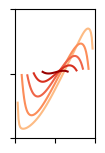

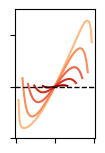

In [33]:
NP = 5  # number of polarization points
NM = 100  # number of mean points
pol_range={"m": 0, "M": 1, "n": NP}  
mean_range={"m": 0, "M": 1, "n": NM}         

pols = homogeneous_distribution(pol_range["n"], pol_range["m"], pol_range["M"])
means = homogeneous_distribution(mean_range["n"], mean_range["m"], mean_range["M"])

results = sweep_pol_mean_SIRV(
    mean_range=mean_range,
    pol_range=pol_range,
    h=0,
    dT=1,
    T=1000,
    susceptibility_rate=0.6,
    batch_size=1000,
    vaccination_rate=0.06
)

(S_final, I_final, R_final, V_final), R0, OH = results
S = np.sum(S_final, axis=1)
I = np.sum(I_final, axis=1)
R = np.sum(R_final, axis=1)

# Correct reshaping
S = S.reshape(NM, NP).T  # Shape becomes (NP, NM)
I = I.reshape(NM, NP).T
R = R.reshape(NM, NP).T
R0 = R0.reshape(NM, NP).T
OH = OH.reshape(NM, NP).T

temp = R + I

fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
for i in range(NP):
    ax.plot(means, temp[i, :], color = CP1[i])

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([0,0.5,1])
ax.set_yticks([0,0.5,1])
name = "SIRV_B_(m)_RI.pdf"

fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels)


# Plot each polarization value
# find the index of the mean value closest to 0.5
idx = np.argmin(np.abs(means - 0.5))
fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
for i in range(NP):
    ax.plot(means, (temp[i, :]-temp[i, idx])/temp[i, idx]*100, color = CP1[i])

# draw a horizontal line at y=0
ax.axhline(0, color='black', lw=1, ls='dashed')
ax.set_ylim(-100, 150)
ax.set_xticks([0,0.5,1])
name = "SIRV_B_(m)_RI100.pdf"

fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


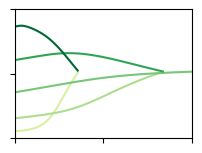

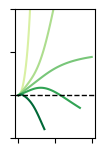

In [34]:
NP = 100  # number of polarization points
NM = 5  # number of mean points
pol_range={"m": 0, "M": 1, "n": NP}  
mean_range={"m": 0, "M": 1, "n": NM}         

pols = homogeneous_distribution(pol_range["n"], pol_range["m"], pol_range["M"])
means = homogeneous_distribution(mean_range["n"], mean_range["m"], mean_range["M"])

results = sweep_pol_mean_SIRV(
    mean_range=mean_range,
    pol_range=pol_range,
    h=0,
    dT=1,
    T=1000,
    susceptibility_rate=0.6,
    batch_size=1000,
    vaccination_rate=0.06
)

(S_final, I_final, R_final, V_final), R0, OH = results
S = np.sum(S_final, axis=1)
I = np.sum(I_final, axis=1)
R = np.sum(R_final, axis=1)

# Correct reshaping
S = S.reshape(NM, NP).T  # Shape becomes (NP, NM)
I = I.reshape(NM, NP).T
R = R.reshape(NM, NP).T
R0 = R0.reshape(NM, NP).T
OH = OH.reshape(NM, NP).T

temp = R + I

fig, ax = plt.subplots(figsize=(Lx, Ly))
for i in range(NM):
    ax.plot(pols, temp[:, i], color = CP2[i])

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([0,0.5,1])
ax.set_yticks([0,0.5,1])

name = "SIRV_B_(pol)_RI.pdf"

fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels)


# Plot each polarization value
fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
for i in range(NM):
    ax.plot(pols, (temp[:, i]-temp[0, i])/temp[0, i]*100, color = CP2[i])
# plot a horizontal line at 0
ax.axhline(0, color='black', lw=1, ls='dashed')
ax.set_ylim(-50, 100)
ax.set_xticks([0,0.5,1])
ax.set_yticks([-50,0,50,100])
name = "SIRV_B_(pol)_RI100.pdf"

fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels)

In [13]:
NP = 100  # number of polarization points
NH = 100  # number of homophily points
h_range={"m": -10.0, "M": 10.0, "n": NH}
pol_range={"m": 0, "M": 1, "n": NP}

homs = homogeneous_distribution(NH, h_range["m"], h_range["M"])
pols = homogeneous_distribution(NP, pol_range["m"], pol_range["M"])

results = sweep_pol_hom_SIRV(
    h_range=h_range,     # homophily range
    pol_range=pol_range,  # polarization range
    dT=1,
    T=1000,
    recovery_rate=0.2,
    susceptibility_rate=0.3,  
    batch_size=1000,
    N_COMPARTMENTS=5,
    vaccination_rate = 2/365
)

(S_final, I_final, R_final), R0, OH = results
S = np.sum(S_final, axis=1)
I = np.sum(I_final, axis=1)
R = np.sum(R_final, axis=1)

# Reshape arrays
S = S.reshape(NP, NH)  # No transpose needed
I = I.reshape(NP, NH)
R = R.reshape(NP, NH)
R0 = R0.reshape(NP, NH)
OH = OH.reshape(NP, NH)

FIG_C_RI = R + I
FIG_C_R0 = R0
FIG_C_OH = OH
homs = np.linspace(h_range["m"], h_range["M"], h_range["n"])

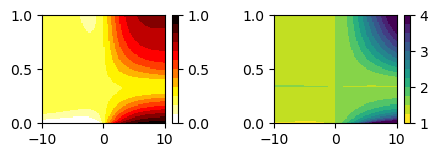

In [36]:
fig, ax = plt.subplots(1,2, figsize=(2*Lx, Ly))

cax = ax[0].imshow(FIG_C_RI, cmap=my_hot_r, aspect="auto", origin="lower",
    extent=[homs[0], homs[-1],0,1], vmin=0, vmax=1, interpolation="none")
cbar = fig.colorbar(cax, ax=ax[0])

cax = ax[1].imshow(FIG_C_R0, cmap=my_vir_r, aspect="auto", origin="lower",
    extent=[homs[0], homs[-1],0,1], interpolation="none", vmin = 1, vmax = 4)
cbar = fig.colorbar(cax, ax=ax[1])

fig.tight_layout()

In [8]:
# homophily values for masks, testing, and vaccination
Mh = np.array([2.2332, 2.5102, 2.7551])
Th = np.array([2.1429, 2.3265, 2.5102])
Vh = np.array([1.6531, 1.8367, 1.9592])

# polarization values for masks, testing, and vaccination
Mp = np.array([0.2658, 0.2898, 0.3149])
Tp = np.array([0.4575, 0.4780, 0.4981])
Vp = np.array([0.5387, 0.5637, 0.5913])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


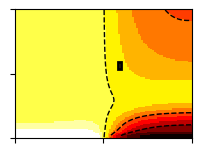

In [14]:
name = "I(h,pol)_SIRV.pdf"
h_vals = homogeneous_distribution(h_range["n"], h_range["m"], h_range["M"])

fig, ax = plt.subplots(figsize=(Lx, Ly))
cax = ax.imshow(FIG_C_RI, cmap =  my_hot_r, aspect = "auto", origin = "lower", extent = [-10,10,0,1], vmin = 0, vmax = 1, interpolation="none")
#cbar = fig.colorbar(cax, ax = ax)
CS = ax.contour(h_vals, pols, FIG_C_RI, levels = [0.25, 0.5, 0.75], linewidths = 1, colors = "black", linestyles = "dashed")
ax.set_yticks([0,0.5,1])
ax.set_xticks([-10,0,10])

# add a square for the homophily-polarization values
# bottom left corner = Vh[0], Vp[0]
# top right corner = Vh[2], Vp[2]
rect = plt.Rectangle((Vh[0], Vp[0]), Vh[2]-Vh[0], Vp[2]-Vp[0], fill=False, edgecolor='black', lw=2)
ax.add_patch(rect)

fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


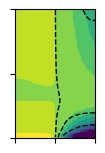

In [16]:
name = "R0(h,pol)_SIRV.pdf"

fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
cax = ax.imshow(FIG_C_R0, cmap =  my_vir_r, aspect = "auto", origin = "lower", extent = [0-10,10,0,1], vmin = 0.999, vmax = 4, interpolation="none")
cbar = fig.colorbar(cax, ax = ax)
CS = ax.contour(h_vals, pols, FIG_C_RI, levels = [0.25, 0.5, 0.75], linewidths = 1, colors = "black", linestyles = "dashed")
ax.set_yticks([0,0.5,1])
ax.set_xticks([-10,0,10])

fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)

In [49]:
CP2[2] = "#000"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-8. -4.  0.  4.  8.]


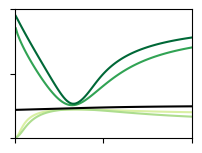

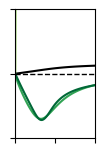

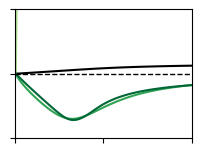

In [50]:
NP = 100  # number of polarization points
NH = 5  # number of homophily points
h_range={"m": -10.0, "M": 10.0, "n": NH}
pol_range={"m": 0, "M": 1, "n": NP}

homs = homogeneous_distribution(h_range["n"], h_range["m"], h_range["M"])
pols = homogeneous_distribution(pol_range["n"], pol_range["m"], pol_range["M"])

results = sweep_pol_hom_SIRV(
    h_range=h_range,     # homophily range
    pol_range=pol_range,  # polarization range
    dT=1,
    T=1000,
    recovery_rate=0.2,
    susceptibility_rate=0.3,  
    batch_size=1000,
    vaccination_rate = 2/365
)

(S_final, I_final, R_final, V_final), R0, OH = results
S = np.sum(S_final, axis=1)
I = np.sum(I_final, axis=1)
R = np.sum(R_final, axis=1)

# Reshape arrays
S = S.reshape(NP, NH)  # No transpose needed
I = I.reshape(NP, NH)
R = R.reshape(NP, NH)
R0 = R0.reshape(NP, NH)
OH = OH.reshape(NP, NH)

temp = R + I

fig, ax = plt.subplots(figsize=(Lx, Ly))
for i in range(NH):
    ax.plot(pols, temp[:, i], color = CP2[i])

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([0,0.5,1])
ax.set_yticks([0,0.5,1])

name = "SIRV_C_(pol)_RI.pdf"
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels)

fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
for i in range(NH):
    ax.plot(pols, (temp[:, i]-temp[0, i])/temp[0, i]*100, color = CP2[i])

ax.set_xlim(0, 1)
ax.set_ylim(-100, 100)
# plot a horizontal line at 0
ax.axhline(0, color='black', lw=1, ls='dashed')
ax.set_xticks([0,0.5,1])
ax.set_yticks([-100,0,100])
name = "SIRV_C_(pol)_RI100.pdf"

fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels)






fig, ax = plt.subplots(figsize=(Lx, Ly))
for i in range(NH):
    ax.plot(pols, (temp[:, i]-temp[0, i])/temp[0, i]*100, color = CP2[i])

ax.set_xlim(0, 1)
ax.set_ylim(-100, 100)
# plot a horizontal line at 0
ax.axhline(0, color='black', lw=1, ls='dashed')
ax.set_xticks([0,0.5,1])
ax.set_yticks([-100,0,100])
name = "SIRV_C_(pol)_RI100_long.pdf"

fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels)


print(homs)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


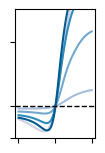

In [41]:
NP = 5  # number of polarization points
NH = 100  # number of homophily points
h_range={"m": -10.0, "M": 10.0, "n": NH}
pol_range={"m": 0, "M": 1, "n": NP}

homs = homogeneous_distribution(h_range["n"], h_range["m"], h_range["M"])
pols = homogeneous_distribution(pol_range["n"], pol_range["m"], pol_range["M"])

results = sweep_pol_hom_SIRV(
    h_range=h_range,     # homophily range
    pol_range=pol_range,  # polarization range
    dT=1,
    T=1000,
    recovery_rate=0.2,
    susceptibility_rate=0.3,  
    batch_size=1000,
    vaccination_rate = 2/365
)

(S_final, I_final, R_final, V_final), R0, OH = results
S = np.sum(S_final, axis=1)
I = np.sum(I_final, axis=1)
R = np.sum(R_final, axis=1)

# Reshape arrays
S = S.reshape(NP, NH)  # No transpose needed
I = I.reshape(NP, NH)
R = R.reshape(NP, NH)
R0 = R0.reshape(NP, NH)
OH = OH.reshape(NP, NH)

temp = R + I

# find the index of the homophily value closest to 0
idx = np.argmin(np.abs(homs - 0))

fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
for i in range(NP):
    ax.plot(homs, (temp[i, :] - temp[i, idx])/temp[i, idx]*100, color = CP3[i])
    ax.set_ylim(-50, 150)

fig.patch.set_visible(False)
# plot a horizontal line at 0
ax.axhline(0, color='black', lw=1, ls='dashed')
ax.set_yticks([-50,0,100])
ax.set_xticks([-10,0,10])
name = "SIRV_C_(h)_RI100.pdf"

fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


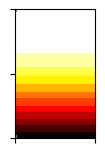

In [2]:
NP = 100
NS = 1
N_COMPARTMENTS = 100


vacc_max_range={"m": 0.075, "M": 0.075, "n": NS}
pol_range={"m": 0, "M": 1, "n": NP}

vaccs = np.linspace(vacc_max_range["m"], vacc_max_range["M"], vacc_max_range["n"])
pols = np.linspace(pol_range["m"], pol_range["M"], pol_range["n"])

results = sweep_pol_SPB_SIRVD(
    vacc_max_range=vacc_max_range,
    pol_range=pol_range,
    dT=1,
    T=1000,
    batch_size=1000,
    N_COMPARTMENTS=N_COMPARTMENTS
)

(S_final, I_final, R_final, V_final), _, _ = results

S = S_final.reshape(NP, N_COMPARTMENTS).transpose()
I = I_final.reshape(NP, N_COMPARTMENTS).transpose()
R = R_final.reshape(NP, N_COMPARTMENTS).transpose()
V = V_final.reshape(NP, N_COMPARTMENTS).transpose()

Sf = np.zeros((N_COMPARTMENTS, NP))
If = np.zeros((N_COMPARTMENTS, NP))
Rf = np.zeros((N_COMPARTMENTS, NP))
Vf = np.zeros((N_COMPARTMENTS, NP))
for i in range(NP):

    N_i = S_final[i,:] + I_final[i,:] + R_final[i,:] + V_final[i,:]
    Sf[:,i] = S_final[i,:]/N_i
    If[:,i] = I_final[i,:]/N_i
    Rf[:,i] = R_final[i,:]/N_i
    Vf[:,i] = V_final[i,:]/N_i

RI = Rf + If
name = "RI_fraction_SIRV_disconnected.pdf"
fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
cax = ax.imshow(np.flipud(RI), cmap = my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0,1], vmin = 0, vmax = 1, interpolation = "none")
cbar = fig.colorbar(cax, ax = ax)
ax.set_yticks([0,0.5,1])

fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


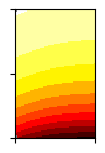

In [52]:
NP = 100
NS = 1
N_COMPARTMENTS = 100


vacc_max_range={"m": 0.075, "M": 0.075, "n": NS}
pol_range={"m": 0, "M": 1, "n": NP}

vaccs = np.linspace(vacc_max_range["m"], vacc_max_range["M"], vacc_max_range["n"])
pols = np.linspace(pol_range["m"], pol_range["M"], pol_range["n"])

results = sweep_pol_SPB_SIRV(
    vacc_max_range=vacc_max_range,
    pol_range=pol_range,
    h=0,
    dT=1,
    T=1000,
    batch_size=1000,
    N_COMPARTMENTS=N_COMPARTMENTS
)

(S_final, I_final, R_final, V_final), _, _ = results

S = S_final.reshape(NP, N_COMPARTMENTS).transpose()
I = I_final.reshape(NP, N_COMPARTMENTS).transpose()
R = R_final.reshape(NP, N_COMPARTMENTS).transpose()
V = V_final.reshape(NP, N_COMPARTMENTS).transpose()

Sf = np.zeros((N_COMPARTMENTS, NP))
If = np.zeros((N_COMPARTMENTS, NP))
Rf = np.zeros((N_COMPARTMENTS, NP))
Vf = np.zeros((N_COMPARTMENTS, NP))
for i in range(NP):

    N_i = S_final[i,:] + I_final[i,:] + R_final[i,:] + V_final[i,:]
    Sf[:,i] = S_final[i,:]/N_i
    If[:,i] = I_final[i,:]/N_i
    Rf[:,i] = R_final[i,:]/N_i
    Vf[:,i] = V_final[i,:]/N_i

RI = Rf + If
name = "RI_fraction_SIRV.pdf"
fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
cax = ax.imshow(np.flipud(RI), cmap = my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0,1], vmin = 0, vmax = 1, interpolation = "none")
cbar = fig.colorbar(cax, ax = ax)
ax.set_yticks([0,0.5,1])

fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


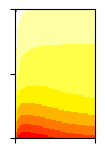

In [53]:
NP = 100
NS = 1
N_COMPARTMENTS = 100


vacc_max_range={"m": 0.075, "M": 0.075, "n": NS}
pol_range={"m": 0, "M": 1, "n": NP}

vaccs = np.linspace(vacc_max_range["m"], vacc_max_range["M"], vacc_max_range["n"])
pols = np.linspace(pol_range["m"], pol_range["M"], pol_range["n"])

results = sweep_pol_SPB_SIRV(
    vacc_max_range=vacc_max_range,
    pol_range=pol_range,
    h=-10,
    dT=1,
    T=1000,
    batch_size=1000,
    N_COMPARTMENTS=N_COMPARTMENTS
)

(S_final, I_final, R_final, V_final), _, _ = results

S = S_final.reshape(NP, N_COMPARTMENTS).transpose()
I = I_final.reshape(NP, N_COMPARTMENTS).transpose()
R = R_final.reshape(NP, N_COMPARTMENTS).transpose()
V = V_final.reshape(NP, N_COMPARTMENTS).transpose()

Sf = np.zeros((N_COMPARTMENTS, NP))
If = np.zeros((N_COMPARTMENTS, NP))
Rf = np.zeros((N_COMPARTMENTS, NP))
Vf = np.zeros((N_COMPARTMENTS, NP))
for i in range(NP):

    N_i = S_final[i,:] + I_final[i,:] + R_final[i,:] + V_final[i,:]
    Sf[:,i] = S_final[i,:]/N_i
    If[:,i] = I_final[i,:]/N_i
    Rf[:,i] = R_final[i,:]/N_i
    Vf[:,i] = V_final[i,:]/N_i

RI = Rf + If
name = "RI_fraction_SIRV_negative_h.pdf"
fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
cax = ax.imshow(np.flipud(RI), cmap = my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0,1], vmin = 0, vmax = 1, interpolation = "none")
cbar = fig.colorbar(cax, ax = ax)
ax.set_yticks([0,0.5,1])

fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


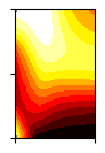

In [54]:
NP = 100
NS = 1
N_COMPARTMENTS = 100


vacc_max_range={"m": 0.075, "M": 0.075, "n": NS}
pol_range={"m": 0, "M": 1, "n": NP}

vaccs = np.linspace(vacc_max_range["m"], vacc_max_range["M"], vacc_max_range["n"])
pols = np.linspace(pol_range["m"], pol_range["M"], pol_range["n"])

results = sweep_pol_SPB_SIRV(
    vacc_max_range=vacc_max_range,
    pol_range=pol_range,
    h=10,
    dT=1,
    T=1000,
    batch_size=1000,
    N_COMPARTMENTS=N_COMPARTMENTS
)

(S_final, I_final, R_final, V_final), _, _ = results

S = S_final.reshape(NP, N_COMPARTMENTS).transpose()
I = I_final.reshape(NP, N_COMPARTMENTS).transpose()
R = R_final.reshape(NP, N_COMPARTMENTS).transpose()
V = V_final.reshape(NP, N_COMPARTMENTS).transpose()

Sf = np.zeros((N_COMPARTMENTS, NP))
If = np.zeros((N_COMPARTMENTS, NP))
Rf = np.zeros((N_COMPARTMENTS, NP))
Vf = np.zeros((N_COMPARTMENTS, NP))
for i in range(NP):

    N_i = S_final[i,:] + I_final[i,:] + R_final[i,:] + V_final[i,:]
    Sf[:,i] = S_final[i,:]/N_i
    If[:,i] = I_final[i,:]/N_i
    Rf[:,i] = R_final[i,:]/N_i
    Vf[:,i] = V_final[i,:]/N_i

RI = Rf + If
name = "RI_fraction_SIRV_positive_h.pdf"
fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
cax = ax.imshow(np.flipud(RI), cmap = my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0,1], vmin = 0, vmax = 1, interpolation = "none")
cbar = fig.colorbar(cax, ax = ax)
ax.set_yticks([0,0.5,1])

fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)